
# 项目：TMDb电影分析报告

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda1">探索：问题1</a></li>
<li><a href="#ques1">结论：问题1</a></li>
<li><a href="#eda2">探索：问题2</a></li>
<li><a href="#ques2">结论：问题2</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：本分析报告基于TMDb电影数据库，包含自1960年以来的电影数据。

> 问题1：每年最受欢迎的电影类别是哪些？

> 问题2：什么样的电影最可能获得高票房？

In [54]:
# 导入语句。
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [55]:
# 加载数据并打印几行。进行这几项操作，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
t_movies = pd.read_csv('tmdb-movies.csv')
t_movies.head()
#t_movies.info()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda1'></a>
## 探索：问题1
### 每年最受欢迎的电影类别是那些

In [56]:
# 定义函数most_pop，取得指定年度最受欢迎的影片类型
def mostpop(year):
    detail_year = t_movies.query('release_year=={}'.format(year))
    count_sum = detail_year.groupby(['release_year', 'genres'], as_index=False).sum()
    count_sorted = count_sum.sort_values(['release_year', 'popularity'], ascending=False)
    count_col = count_sorted.head(1)[['release_year', 'genres', 'popularity']]
    return count_col

In [57]:
# 取得年度列表
year_list = t_movies['release_year'].unique()

In [58]:
# 创建dataframe，用于存储影片
df_show = pd.DataFrame(columns = ['release_year', 'genres', 'popularity'])
# 使用循环，取得每年最受欢迎的影片
for y in year_list:
    df_show = df_show.append(mostpop(y), ignore_index=True)
# 显示列表    
df_show.sort_values(['release_year'], ascending=True)


,release_year,genres,popularity
44,1960,Drama|Horror|Thriller,2.610362
43,1961,Adventure|Animation|Comedy|Family,2.631987
39,1962,Adventure|Action|Thriller,3.170651
48,1963,Action|Thriller|Adventure,2.508235
40,1964,Adventure|Action|Thriller,3.153791
52,1965,Adventure|Action|Thriller,1.910465
55,1966,Animation|Family|Comedy,1.227582
47,1967,Comedy|Drama|Romance,2.958316
36,1968,Science Fiction|Mystery|Adventure,3.309196
53,1969,Drama,1.796789


<a id='ques1'></a>
### 结论--问题1：以上结果列出了1960年至2015年期间，每年最受欢迎的电影类别。

<a id='eda2'></a>
## 探索：问题2
### 那些电影最可能获得高票房

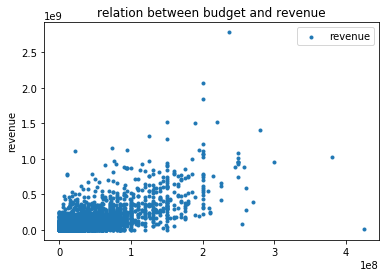

In [59]:
# 研究票房与投资预算的关系
plt.scatter(t_movies.budget,t_movies.revenue,marker='.')
plt.title('relation between budget and revenue')
plt.ylabel('revenue');
plt.legend()


由上一散点图可知，高投资是高票房的基础，但高投资并不必然带来高票房。

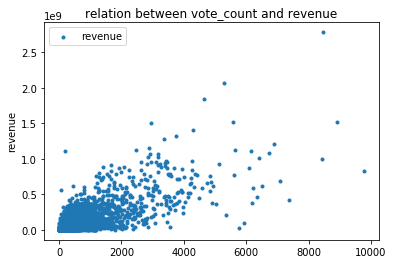

In [60]:
# 研究票房与投票数的关系
plt.scatter(t_movies.vote_count,t_movies.revenue,marker='.')
plt.title('relation between vote_count and revenue')
plt.ylabel('revenue');
plt.legend()

由上一散点图可知，高关注率的电影，票房较高。

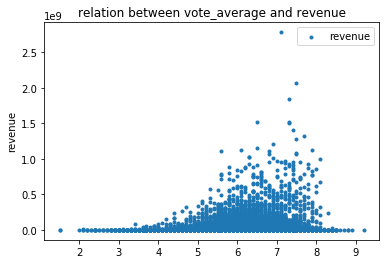

In [61]:
# 研究票房与评分的关系
plt.scatter(t_movies.vote_average,t_movies.revenue,marker='.')
plt.title('relation between vote_average and revenue')
plt.ylabel('revenue');
plt.legend()

由上一散点图可知，评分越高票房也越高。

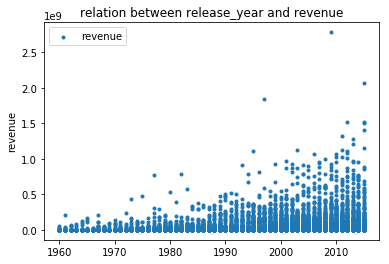

In [62]:
# 研究票房与年度的关系
plt.scatter(t_movies.release_year,t_movies.revenue,marker='.')
plt.title('relation between release_year and revenue')
#plt.xlabel('budget');
plt.ylabel('revenue');
plt.legend()

由上一散点图可知，随着时间的演进，电影票房也在升高。

<a id='ques2'></a>
### 结论--问题2：由以上分析可知，高投资、高关注、高评分的电影，更可能获得高票房。